<a href="https://colab.research.google.com/github/ehpub/KFQ_MLDL_2023/blob/main/2023_kfq_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EB%94%A5%EB%9F%AC%EB%8B%9D_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%8B%9C%EC%9E%91%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

강의 교재 : https://wikibook.co.kr/mymlrev/

In [2]:
from tensorflow import keras
from keras.datasets import mnist

In [3]:
data = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
train_data, test_data = data
x_train, y_train = train_data
x_test, y_test = test_data

In [7]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [9]:
import matplotlib.pyplot as plt

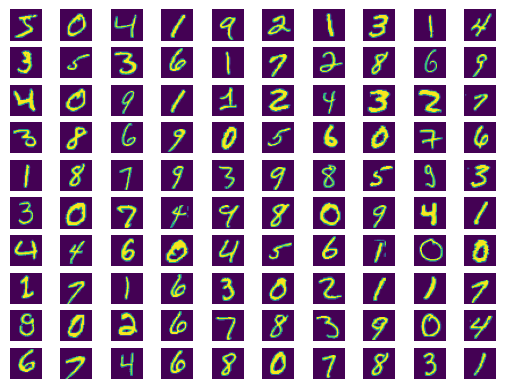

In [15]:
fig,axs = plt.subplots(ncols=10,nrows=10)
for r in range(10):
  for c in range(10):
    axs[r][c].axis('off')
    axs[r][c].imshow(x_train[r*10+c])

In [17]:
for r in range(10):
  for c in range(10):
    print(y_train[r*10+c],end=' ')
  print()

5 0 4 1 9 2 1 3 1 4 
3 5 3 6 1 7 2 8 6 9 
4 0 9 1 1 2 4 3 2 7 
3 8 6 9 0 5 6 0 7 6 
1 8 7 9 3 9 8 5 9 3 
3 0 7 4 9 8 0 9 4 1 
4 4 6 0 4 5 6 1 0 0 
1 7 1 6 3 0 2 1 1 7 
9 0 2 6 7 8 3 9 0 4 
6 7 4 6 8 0 7 8 3 1 


In [20]:
x_train[0].max(),x_train[0].min()

(255, 0)

In [21]:
xs_train = x_train/255.0
xs_test = x_test/255.0

In [22]:
print(xs_train.shape, xs_test.shape)
xs_train = xs_train.reshape(-1,28*28)
xs_test = xs_test.reshape(-1,28*28)
print(xs_train.shape, xs_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 784) (10000, 784)


In [25]:
from keras import layers
from keras import models

In [26]:
model = models.Sequential()
dense = layers.Dense(10,
                     activation='softmax',
                     input_shape=(784,))
model.add(dense)
lf = keras.losses.sparse_categorical_crossentropy
model.compile(loss=lf,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(xs_train,y_train,epochs=100)

Epoch 1/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4434 - accuracy: 0.8815
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3038 - accuracy: 0.9157
Epoch 3/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2899 - accuracy: 0.9198
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2846 - accuracy: 0.9223
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2803 - accuracy: 0.9245
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2773 - accuracy: 0.9256
Epoch 7/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2754 - accuracy: 0.9267
Epoch 8/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2740 - accuracy: 0.9273
Epoch 9/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2725 - accuracy: 0.9283
Epoch 10/100
1875/1875 [==============================] - 3s 2ms/step - l

In [28]:
model.fit(xs_train,y_train,epochs=200)

Epoch 1/200
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2608 - accuracy: 0.9362
Epoch 2/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2603 - accuracy: 0.9355
Epoch 3/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2605 - accuracy: 0.9364
Epoch 4/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2603 - accuracy: 0.9359
Epoch 5/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2609 - accuracy: 0.9362
Epoch 6/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2605 - accuracy: 0.9368
Epoch 7/200
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2603 - accuracy: 0.9365
Epoch 8/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2604 - accuracy: 0.9361
Epoch 9/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2602 - accuracy: 0.9364
Epoch 10/200
1875/1875 [==============================] - 3s 2ms/step - l

In [30]:
model = models.Sequential()
dense1 = layers.Dense(100,
                     activation='relu',
                     input_shape=(784,))
dense2 = layers.Dense(28,
                     activation='relu')
dense3 = layers.Dense(10,
                     activation='softmax')
model.add(dense1)
model.add(dense2)
model.add(dense3)
lf = keras.losses.sparse_categorical_crossentropy
model.compile(loss=lf,metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 28)                2828      
                                                                 
 dense_6 (Dense)             (None, 10)                290       
                                                                 
Total params: 81,618
Trainable params: 81,618
Non-trainable params: 0
_________________________________________________________________


In [31]:
hist = model.fit(xs_train,
                 y_train,
                 epochs=200,
                 validation_split=0.2)

Epoch 1/200
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2869 - accuracy: 0.9170 - val_loss: 0.1620 - val_accuracy: 0.9539
Epoch 2/200
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1267 - accuracy: 0.9622 - val_loss: 0.1255 - val_accuracy: 0.9648
Epoch 3/200
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0927 - accuracy: 0.9723 - val_loss: 0.1093 - val_accuracy: 0.9689
Epoch 4/200
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0733 - accuracy: 0.9782 - val_loss: 0.1151 - val_accuracy: 0.9692
Epoch 5/200
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0614 - accuracy: 0.9822 - val_loss: 0.0991 - val_accuracy: 0.9736
Epoch 6/200
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0504 - accuracy: 0.9850 - val_loss: 0.1129 - val_accuracy: 0.9737
Epoch 7/200
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0428 - accuracy: 0.9870 - val_loss: 0.1100 - val_ac

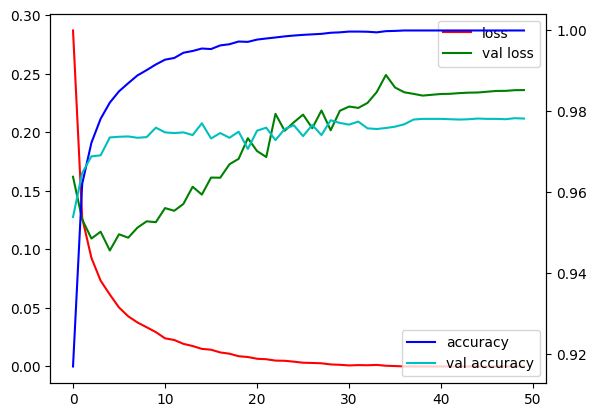

In [36]:
_,ax = plt.subplots()
ax.plot(hist.history['loss'][:50],label='loss',color='r')
ax.plot(hist.history['val_loss'][:50],label='val loss',color='g')
ax2 = ax.twinx()
ax2.plot(hist.history['accuracy'][:50],label='accuracy',color='b')
ax2.plot(hist.history['val_accuracy'][:50],label='val accuracy',color='c')
ax.legend()
ax2.legend()
plt.show()

In [37]:
model.evaluate(xs_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1955 - accuracy: 0.9802


[0.19548115134239197, 0.9801999926567078]